# Pymaceuticals Inc.
---

### Analysis


 

In [94]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mice_study_df = pd.merge(study_results,mouse_metadata, on='Mouse ID', how='left')

# Display the data table for preview
mice_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [95]:
# Checking the number of unique mice.
len(mice_study_df['Mouse ID'].unique())

249

In [96]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mice_study_df.loc[mice_study_df.duplicated()]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.0,0,Propriva,Female,21,26


In [97]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouseID_data = mice_study_df[mice_study_df['Mouse ID']=='g989']
duplicate_mouseID_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [99]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_df = mice_study_df.drop_duplicates(subset=['Mouse ID'])
clean_mice_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [101]:
clean_mice_df[clean_mice_df['Mouse ID']=='g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.0,0,Propriva,Female,21,26


In [102]:
clean_mice_df = clean_mice_df.drop(clean_mice_df[clean_mice_df['Mouse ID']=='g989'].index)
len(clean_mice_df)

248

## Summary Statistics

In [103]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor = mice_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_tumor = mice_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var_tumor = mice_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_tumor = mice_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
std_err_tumor = mice_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()


# Assemble the resulting series into a single summary DataFrame.
summary_stat = pd.concat([mean_tumor,median_tumor,var_tumor,std_tumor,std_err_tumor],keys=['Mean Tumor Volume','Median Tumor Volume','Tumor Volume Variance','Tumor Volume Std. Dev','Tumor Volume Std. Err'],axis=1)
summary_stat

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [104]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
mice_study_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [112]:
mouse_timepoint = mice_study_df.groupby('Drug Regimen')[['Mouse ID','Timepoint']].count()
mouse_timepoint = mouse_timepoint.sort_values('Timepoint',ascending=False)
mouse_timepoint

,Mouse ID,Timepoint
Drug Regimen,,
Capomulin,230,230
Ramicane,228,228
Ketapril,188,188
Naftisol,186,186
Zoniferol,182,182
Placebo,181,181
Stelasyn,181,181
Ceftamin,178,178
Infubinol,178,178


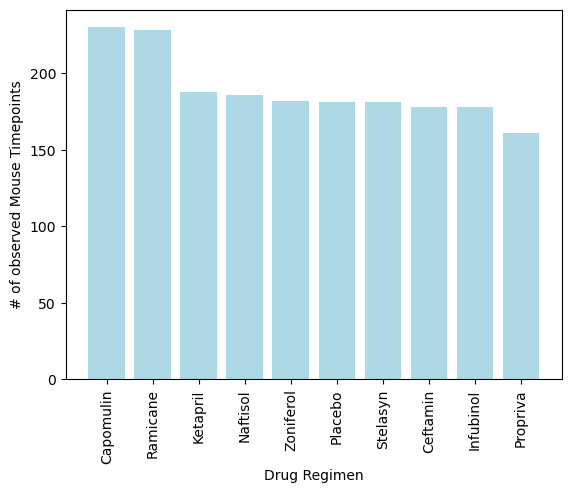

In [113]:
# Bar chart with the Matplotlib's method
plt.bar(mouse_timepoint.index, mouse_timepoint['Timepoint'], color='lightblue', width=0.8, align='center')
plt.xticks(rotation='vertical')
plt.ylabel('# of observed Mouse Timepoints')
plt.xlabel("Drug Regimen")
plt.show()

In [114]:
regimen_timept = mouse_timepoint['Timepoint']
regimen_timept

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     161
Name: Timepoint, dtype: int64

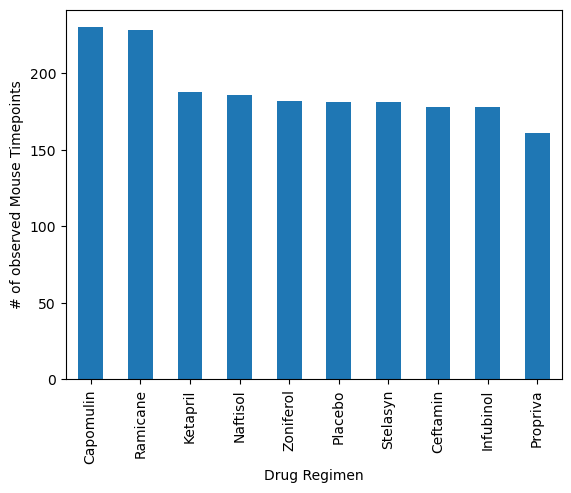

In [115]:
# Bar chart with Pandas method
regimen_timept.plot(kind='bar')
plt.ylabel('# of observed Mouse Timepoints')
plt.xlabel("Drug Regimen")
plt.show()

<Axes: ylabel='Sex_Count'>

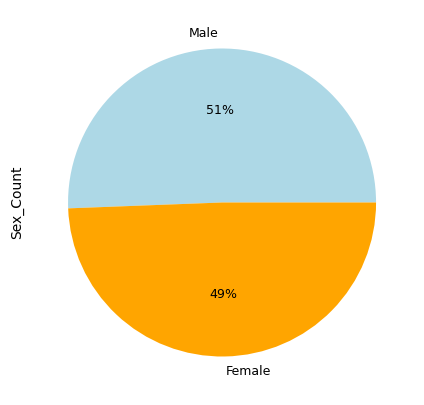

In [118]:
# Generate a pie plot showing the distribution of female versus male mice using matplotlib's method

labels = ['Male','Female']
colors = ['lightblue','orange']
dict2 = {'Sex': ['Male','Female'], 'Sex_Count': [len(mice_study_df[mice_study_df["Sex"]=="Male"]),len(mice_study_df[mice_study_df["Sex"]=="Female"])]}
dict2
df2 = pd.DataFrame(dict2)
df2.plot.pie(y='Sex_Count', figsize=(6,5), fontsize=9, 
     colors=colors, labels=labels,autopct = '%1.0f%%',
             legend=False)

<Axes: ylabel='Sex_Count'>

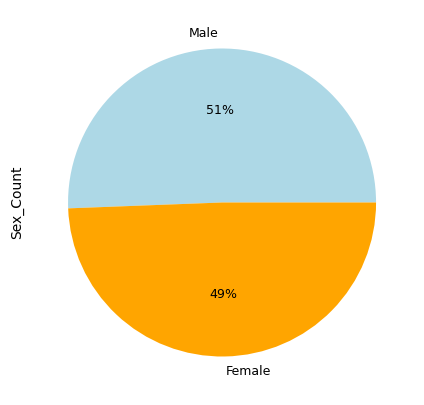

In [119]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

dict2 = {'Sex': ['Male','Female'], 'Sex_Count': [len(mice_study_df[mice_study_df["Sex"]=="Male"]),len(mice_study_df[mice_study_df["Sex"]=="Female"])]}
dict2
df2 = pd.DataFrame(dict2)
labels = ['Male','Female']
colors = ['lightblue','orange']
df2.plot.pie(y='Sex_Count', figsize=(6,5), fontsize=9, 
     colors=colors, labels=labels,autopct = '%1.0f%%',
             legend=False)

## Quartiles, Outliers and Boxplots

In [121]:
# Start by getting the last (greatest) timepoint for each mouse
lasttimept = mice_study_df.groupby(['Mouse ID'])['Timepoint'].max()
lasttimept = lasttimept.reset_index()
lasttimept

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_vol = lasttimept.merge(mice_study_df, on=['Mouse ID','Timepoint'], how='left')
tumor_vol

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [122]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumorvol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
# Locate the rows which contain mice on each drug and get the tumor volumes    

for i in treatments:
    final_tumor = tumor_vol.loc[tumor_vol["Drug Regimen"] == i, 'Tumor Volume (mm3)']
    tumorvol_data.append(final_tumor) 
        
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor.loc[(final_tumor < lower_bound) | (final_tumor > upper_bound)]
    print(f"{i}'s potential outliers: {outliers}")
    
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


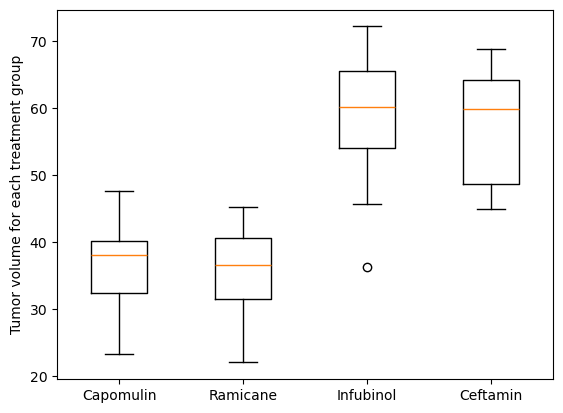

In [123]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.boxplot(tumorvol_data, labels=treatments)
plt.ylabel('Tumor volume for each treatment group')
plt.show()

## Line and Scatter Plots

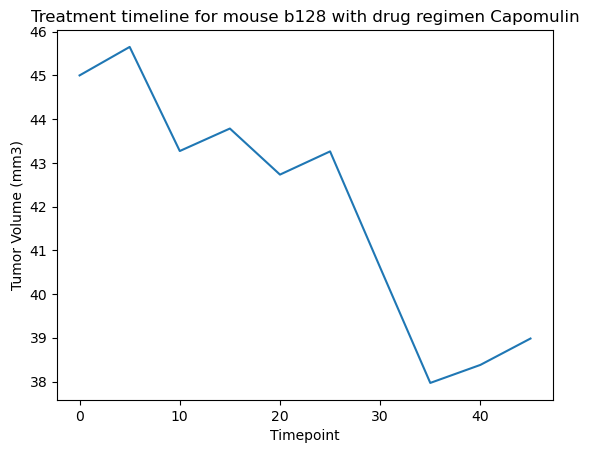

In [124]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

capomulin_b128_df = mice_study_df[(mice_study_df['Drug Regimen']=='Capomulin') & (mice_study_df['Mouse ID']=='b128')]
tum_vol = capomulin_b128_df['Tumor Volume (mm3)']
tim_pt = capomulin_b128_df['Timepoint']
plt.plot(tim_pt,tum_vol)
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Treatment timeline for mouse b128 with drug regimen Capomulin')
plt.show()


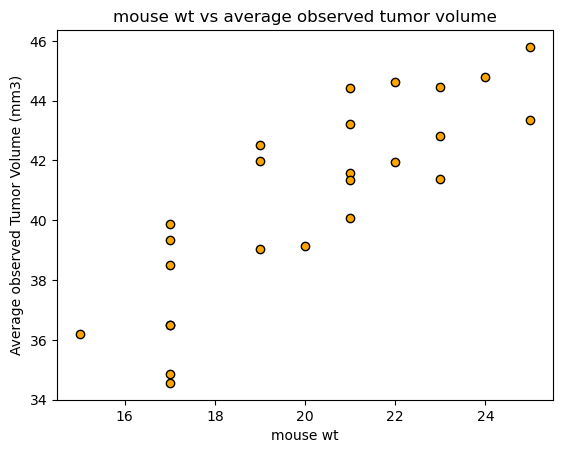

In [125]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_df = mice_study_df.loc[mice_study_df['Drug Regimen']=='Capomulin']
capomulin_average = capomulin_df.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'],marker="o", facecolors="orange", edgecolors="black")
plt.xlabel('mouse wt')
plt.ylabel('Average observed Tumor Volume (mm3)')
plt.title('mouse wt vs average observed tumor volume')
plt.show()

## Correlation and Regression

In [126]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Correlation coefficient
correlation = st.pearsonr(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
print(f"The correlation coefficent between mouse weight and average observed tumor volume  is {round(correlation[0],2)}")

The correlation coefficent between mouse weight and average observed tumor volume  is 0.84


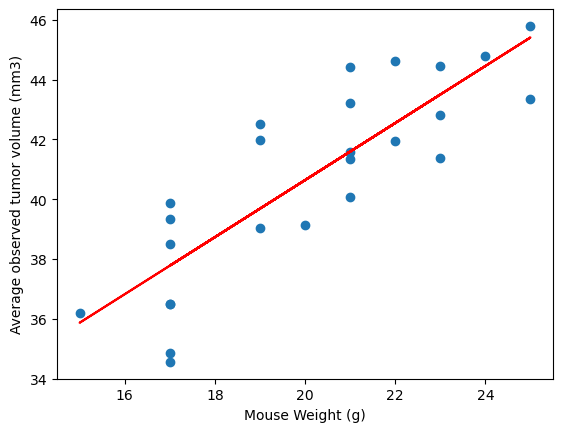

In [127]:
# Linear Regression Model
from scipy.stats import linregress

x_values = capomulin_average['Weight (g)']
y_values = capomulin_average['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average observed tumor volume (mm3)')
plt.show()